In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


esperance au
victoria sc
qaanaaq gl
phalaborwa za
upernavik gl
barrow us
hobart au
luderitz na
busselton au
victoria sc
rikitea pf
yellowknife ca
cabo san lucas mx
busselton au
castro cl
port alfred za
berwick us
rikitea pf
kaitangata nz
punta arenas cl
attawapiskat ca
havre-saint-pierre ca
makokou ga
ushuaia ar
taolanaro mg
bredasdorp za
van tr
vardo no
illoqqortoormiut gl
dongsheng cn
itacoatiara br
sinnamary gf
rikitea pf
atuona pf
puerto ayora ec
taolanaro mg
lompoc us
mataura pf
tasiilaq gl
samalaeulu ws
asfi ma
alamo mx
punta arenas cl
tuatapere nz
angoche mz
temaraia ki
kotelnikovo ru
rikitea pf
constitucion mx
ushuaia ar
mahanoro mg
krutikha ru
ushuaia ar
yambio sd
chuy uy
alcacer do sal pt
rikitea pf
nanortalik gl
baft ir
carnarvon au
le port re
hermanus za
algeciras co
tilichiki ru
dikson ru
saint-philippe re
alto araguaia br
mascote br
chapais ca
qaanaaq gl
atuona pf
chabahar ir
mataura pf
lagoa pt
san cristobal ec
qaanaaq gl
machali cl
ribeira grande pt
hermanus za
gawler a

dunedin nz
touros br
rikitea pf
taolanaro mg
ribeira grande pt
mataura pf
alofi nu
saint george bm
notre-dame-du-lac ca
kargasok ru
clyde river ca
bredasdorp za
saldanha za
ribeira grande pt
esperance au
san policarpo ph
taolanaro mg
henties bay na
busselton au
vaini to
pisco pe
yerbogachen ru
portland au
baykit ru
podbelsk ru
saint anthony ca
albany au
yellowknife ca
taolanaro mg
vila franca do campo pt
illoqqortoormiut gl
ushuaia ar
kodiak us
kokstad za
bengkulu id
rikitea pf
lebu cl
bethel us
ushuaia ar
atuona pf
salinas ec
laguna br
castro cl
bengkulu id
barentsburg sj
kozhva ru
rockhampton au
vanimo pg
port alfred za
port alfred za
bundaberg au
mataura pf
mahebourg mu
jamestown sh
hamilton us
busselton au
westlock ca
qaanaaq gl
kodiak us
busselton au
portland au
norman wells ca
busselton au
punta arenas cl
davenda ru
upernavik gl
nikolskoye ru
rikitea pf
saint-philippe re
thompson ca
hermanus za
calama cl
dikson ru
pisco pe
grindavik is
rikitea pf
cape town za
phalodi in
tuktoyakt

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


615

In [9]:
import requests
requests.__version__


'2.24.0'

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#city_url = url + "&q="
# Import the datetime module from the datetime library.
from datetime import datetime


In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"


Beginning Data Retrieval     
-----------------------------


In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Processing Record 16 of Set 25 | esperance
Processing Record 17 of Set 25 | victoria
Processing Record 18 of Set 25 | qaanaaq
Processing Record 19 of Set 25 | phalaborwa
Processing Record 20 of Set 25 | upernavik
Processing Record 21 of Set 25 | barrow
Processing Record 22 of Set 25 | hobart
Processing Record 23 of Set 25 | luderitz
Processing Record 24 of Set 25 | busselton
Processing Record 25 of Set 25 | rikitea
Processing Record 26 of Set 25 | yellowknife
Processing Record 27 of Set 25 | cabo san lucas
Processing Record 28 of Set 25 | castro
Processing Record 29 of Set 25 | port alfred
Processing Record 30 of Set 25 | berwick
Processing Record 31 of Set 25 | kaitangata
Processing Record 32 of Set 25 | punta arenas
Processing Record 33 of Set 25 | attawapiskat
City not found. Skipping...
Processing Record 34 of Set 25 | havre-saint-pierre
Processing Record 35 of Set 25 | makokou
Processing Record 36 of Set 25 | ushuaia
Processing Record 37 of Set 25 | taolanaro
City not found. Skipp

Processing Record 38 of Set 28 | ponta delgada
Processing Record 39 of Set 28 | rungata
City not found. Skipping...
Processing Record 40 of Set 28 | svetlaya
Processing Record 41 of Set 28 | roma
Processing Record 42 of Set 28 | xining
Processing Record 43 of Set 28 | faya
Processing Record 44 of Set 28 | ribeira brava
Processing Record 45 of Set 28 | yithion
City not found. Skipping...
Processing Record 46 of Set 28 | susacon
Processing Record 47 of Set 28 | kofarnihon
City not found. Skipping...
Processing Record 48 of Set 28 | rimbey
Processing Record 49 of Set 28 | hue
Processing Record 50 of Set 28 | te anau
Processing Record 1 of Set 29 | cidreira
Processing Record 2 of Set 29 | tual
Processing Record 3 of Set 29 | bathsheba
Processing Record 4 of Set 29 | clyde river
Processing Record 5 of Set 29 | geraldton
Processing Record 6 of Set 29 | anchorage
Processing Record 7 of Set 29 | wageningen
Processing Record 8 of Set 29 | narsaq
Processing Record 9 of Set 29 | northam
Processin

Processing Record 20 of Set 32 | bima
Processing Record 21 of Set 32 | mehamn
Processing Record 22 of Set 32 | reconquista
Processing Record 23 of Set 32 | pangnirtung
Processing Record 24 of Set 32 | ginir
Processing Record 25 of Set 32 | malanje
Processing Record 26 of Set 32 | marcona
City not found. Skipping...
Processing Record 27 of Set 32 | amahai
Processing Record 28 of Set 32 | tazovskiy
Processing Record 29 of Set 32 | altay
Processing Record 30 of Set 32 | toktogul
Processing Record 31 of Set 32 | colac
Processing Record 32 of Set 32 | dhidhdhoo
Processing Record 33 of Set 32 | humaita
Processing Record 34 of Set 32 | nome
Processing Record 35 of Set 32 | kampot
Processing Record 36 of Set 32 | juba
Processing Record 37 of Set 32 | rosetta
Processing Record 38 of Set 32 | preobrazheniye
Processing Record 39 of Set 32 | ndele
Processing Record 40 of Set 32 | pemangkat
Processing Record 41 of Set 32 | formosa
Processing Record 42 of Set 32 | ballina
Processing Record 43 of Set

Processing Record 2 of Set 36 | matara
Processing Record 3 of Set 36 | padang
Processing Record 4 of Set 36 | kayes
Processing Record 5 of Set 36 | sal rei
Processing Record 6 of Set 36 | chippewa falls
Processing Record 7 of Set 36 | tidore
City not found. Skipping...
Processing Record 8 of Set 36 | okakarara
Processing Record 9 of Set 36 | moyo
Processing Record 10 of Set 36 | mirador
Processing Record 11 of Set 36 | kontagora
Processing Record 12 of Set 36 | jalu
Processing Record 13 of Set 36 | petropavlovsk-kamchatskiy
Processing Record 14 of Set 36 | nizhneyansk
City not found. Skipping...
Processing Record 15 of Set 36 | nakuru
Processing Record 16 of Set 36 | souillac
Processing Record 17 of Set 36 | trinidad
Processing Record 18 of Set 36 | mankono
Processing Record 19 of Set 36 | hovd
Processing Record 20 of Set 36 | pilar
Processing Record 21 of Set 36 | hasaki
Processing Record 22 of Set 36 | orocue
Processing Record 23 of Set 36 | abu jubayhah
City not found. Skipping...
P

In [15]:
len(city_data)

1118

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaspiyskiy,45.39,47.37,60.42,63,94,14.54,RU,2020-10-05 00:34:11
1,Faanui,-16.48,-151.75,78.40,78,67,13.38,PF,2020-10-05 00:34:12
2,Poncitlan,20.37,-102.92,78.80,26,5,3.80,MX,2020-10-05 00:34:12
3,Atuona,-9.80,-139.03,77.83,78,26,15.75,PF,2020-10-05 00:34:12
4,Vaini,-21.20,-175.20,75.20,88,75,12.75,TO,2020-10-05 00:34:12
5,Ponta Do Sol,32.67,-17.10,71.60,68,75,16.11,PT,2020-10-05 00:34:12
6,Ushuaia,-54.80,-68.30,44.60,65,20,6.93,AR,2020-10-05 00:34:12
7,Barcelos,41.54,-8.62,55.99,93,75,5.28,PT,2020-10-05 00:34:13
8,Vizinga,61.07,50.10,30.88,96,34,4.92,RU,2020-10-05 00:34:13
9,Ocampo,21.65,-101.50,53.92,45,0,19.08,MX,2020-10-05 00:34:13


In [16]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaspiyskiy,RU,2020-10-05 00:34:11,45.39,47.37,60.42,63,94,14.54
1,Faanui,PF,2020-10-05 00:34:12,-16.48,-151.75,78.40,78,67,13.38
2,Poncitlan,MX,2020-10-05 00:34:12,20.37,-102.92,78.80,26,5,3.80
3,Atuona,PF,2020-10-05 00:34:12,-9.80,-139.03,77.83,78,26,15.75
4,Vaini,TO,2020-10-05 00:34:12,-21.20,-175.20,75.20,88,75,12.75
5,Ponta Do Sol,PT,2020-10-05 00:34:12,32.67,-17.10,71.60,68,75,16.11
6,Ushuaia,AR,2020-10-05 00:34:12,-54.80,-68.30,44.60,65,20,6.93
7,Barcelos,PT,2020-10-05 00:34:13,41.54,-8.62,55.99,93,75,5.28
8,Vizinga,RU,2020-10-05 00:34:13,61.07,50.10,30.88,96,34,4.92
9,Ocampo,MX,2020-10-05 00:34:13,21.65,-101.50,53.92,45,0,19.08


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today


'10/05/20'

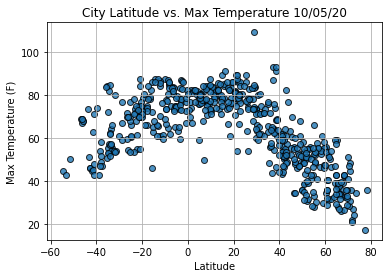

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


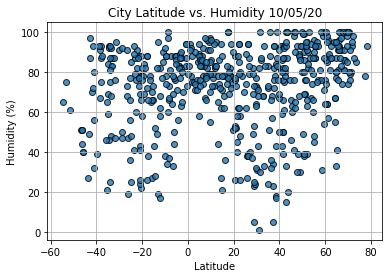

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


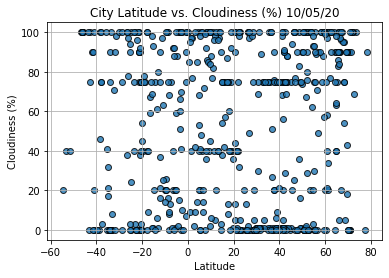

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


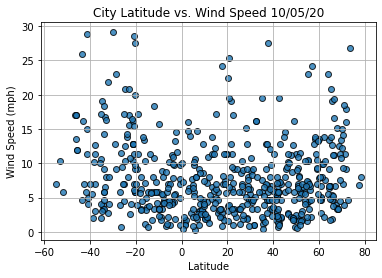

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [24]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


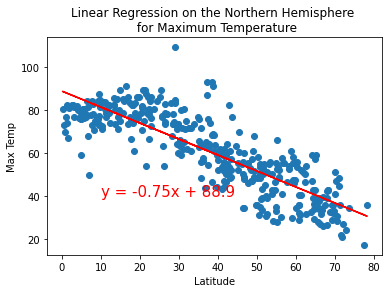

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


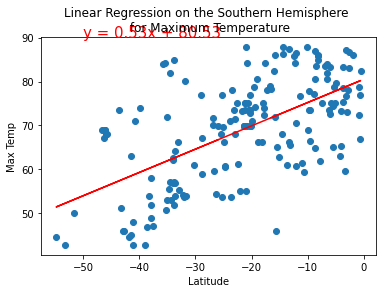

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

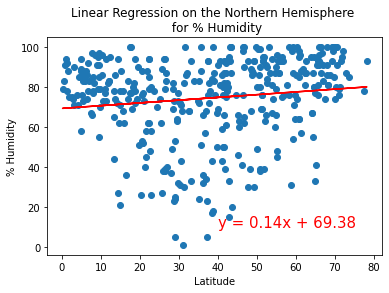

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


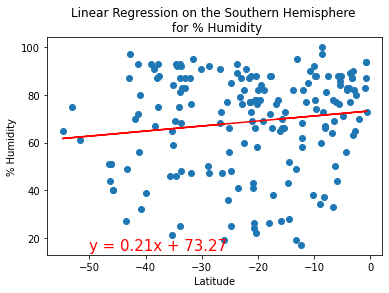

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))


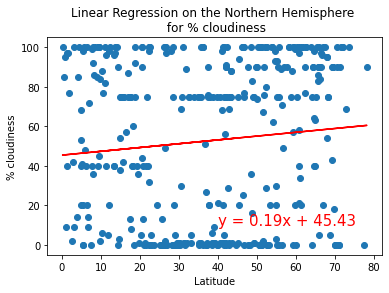

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % cloudiness', '% cloudiness',(40,10))


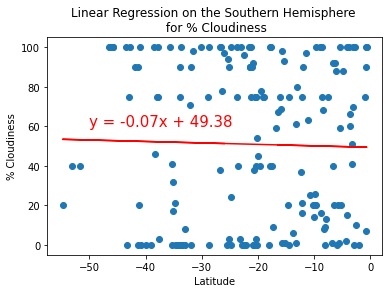

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


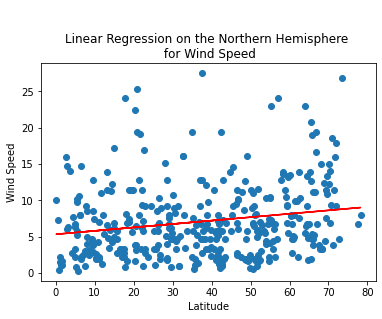

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))


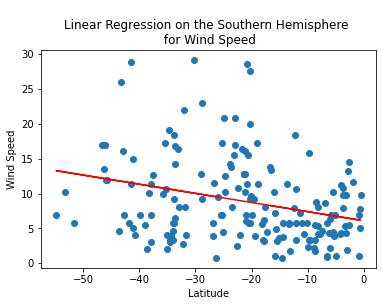

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))
